<a href="https://colab.research.google.com/github/SwathiAenugu/AI-and-Machine-Learning-Lab/blob/main/AI_Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Given a training set of patient records of Systolic Blood Pressure (SBP) regarding two features, such as age and weight, please build up linear regression hypothesis function/loss function /cost function, and then write python program to implement this algorithm by gradient descent method. After hypothesis function training through training set, predict new patient’s SBP**

 
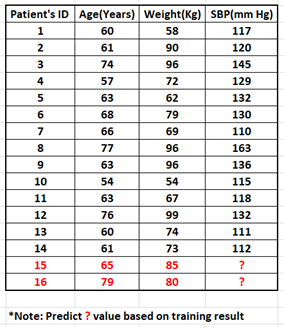


In [4]:
ID= [i for i in range(1,17)]
Age = [60, 61, 74, 57, 63, 68, 66, 77, 63, 54, 63, 76, 60, 61, 65, 79]
Weight = [58, 90, 96, 72, 62, 79, 69, 96, 96, 54, 67, 99, 74, 73, 85, 80]
SBP= [117, 120, 145, 129, 132, 130, 110, 163, 136, 115, 118, 132, 111, 112, 0, 0]

from sklearn.linear_model import LinearRegression #import file for linear regression
import pandas as pd                                
data = {"Age":Age, "Weight":Weight, "SBP":SBP}
data = pd.DataFrame(data = data)
x = data[["Age", "Weight"]]
y = data["SBP"]
x_train = x[:14]
x_test = x[14:]
y_train = y[:14]
y_test = y[14:]
model_test = LinearRegression()
model_test.fit(x_train, y_train)
predict = model_test.predict(x_test)

print("Predicted values=",predict)

Predicted values= [129.01956696 142.76293569]


**2. Assuming that Y is the function of X in the following training set, please try to take second-order hypothesis function to fit (X,Y) coordinate points by curve Y = f(X). Before writing python program to implement regression by gradient descent algorithm, hypothesis function/loss function/cost function are needed for getting all the parameters θs in hypothesis. After training regression module, plot (X,Y) points and the fitting curve by matplotlib python functions**

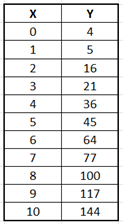



Curve for second degree function=


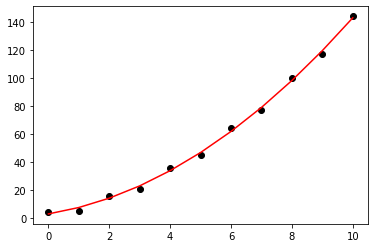

In [9]:
import numpy as np
data = np.array([[0,4],[1,5],[2,16],[3,21],[4,36],[5,45],[6,64],[7,77],[8,100],[9,117],[10,144]])
x, Y = data[:,:1], data[:, 1]
from sklearn.preprocessing import PolynomialFeatures

PolyReg = PolynomialFeatures(degree=2)   
X_poly = PolyReg.fit_transform(x) 

pol_reg = LinearRegression()
pol_reg.fit(X_poly,Y)

import matplotlib.pyplot as plt 
plt.scatter(x, Y, color='BLACK')
print("Curve for second degree function=")
plt.plot(x, pol_reg.predict(PolyReg.fit_transform(x)), color='RED') 

**3. Write Python program to find the parameters θs in the hypothesis function for the above dataset (dataset in q2) by Cramer’s rule. And compare the results with those coming from gradient descent algorithm**

Inverse of x transpose * x=
 [[ 0.31818182 -0.04545455]
 [-0.04545455  0.00909091]]

xT * y= [ 629. 4685.]

(xT * y)*inv= [-12.81818182  14.        ]

Comparing and plotting: 
theta0 =  -12.818181818181841
theta1 =  13.999999999999996


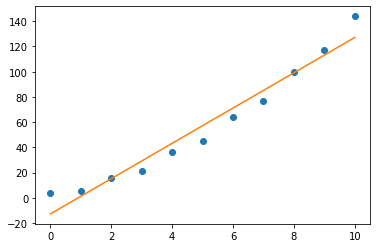

In [15]:
import numpy as np
data = np.array([[0,4],[1,5],[2,16],[3,21],[4,36],[5,45],[6,64],[7,77],[8,100],[9,117],[10,144]])
x, y= data[:,:1], data[:, 1]

M = 11   #length of data set
x_bias = np.ones((M,1))
X = np.reshape(x, (M,1))
X = np.append(x_bias,x,axis=1)
#(xTx)^(-1)
x_transpose = np.transpose(X)   # Transpose
product = x_transpose.dot(X)    # X transpose* X

temp1 = np.linalg.inv(product) 
print("Inverse of x transpose * x=\n",temp1)       # Inverse of product

temp2 = x_transpose.dot(y)      # X transpose* y
print("\nxT * y=""",temp2)

theta = temp1.dot(temp2)
print("\n(xT * y)*inv=""",theta)
print("\nComparing and plotting: ")
print("theta0 = """, theta[0])
print("theta1 ="" ", theta[1])

import matplotlib.pyplot as plt 
plt.scatter(x,y)
plt.plot(X, theta[0] + theta[1]*X)